In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

milk = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\milk.csv",index_col=0)
pca = PCA().set_output(transform ='pandas')
principalComponents = pca.fit_transform(milk)
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(milk)
milkscaled = scaler.transform(milk)


clust = KMeans(n_clusters=2,random_state=24)
clust.fit(milkscaled)

print(clust.inertia_)

49.854659507364545


0.40757264882822525


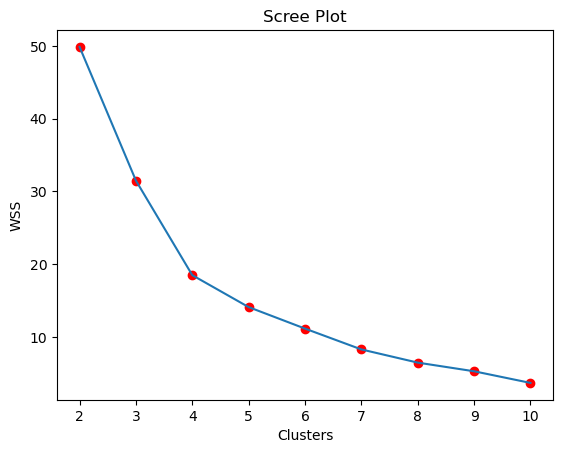

In [12]:
pca = PCA().set_output(transform ='pandas')
principalComponents = pca.fit_transform(milk)


print(silhouette_score(milkscaled, clust.labels_))

Ks = [2,3,4,5,6,7,8,9,10]
scores = []
for i in Ks:

    clust = KMeans(n_clusters=i,random_state=24)
    clust.fit(milkscaled)
    scores.append(clust.inertia_)
plt.scatter(Ks , scores, c= 'red')
plt.plot(Ks , scores)
plt.title("Scree Plot")
plt.xlabel("Clusters")
plt.ylabel('WSS')
plt.show()

In [13]:
i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

clust = KMeans(n_clusters=Ks[i_max],random_state=24)
clust.fit(milkscaled)

print(clust.labels_)

df_clust = milk.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)

Best no. of clusters: 2
Best Score: 49.854659507364545
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0]


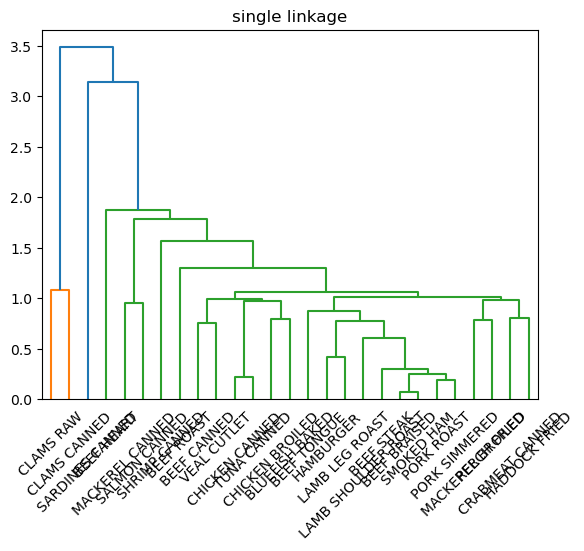

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

nut = pd.read_csv(r"C:\Users\dai\Desktop\Machine Learning\Datasets\nutrient.csv",index_col=0)

scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(nut)
nutscaled = scaler.transform(nut)

link = "single"
mergings = linkage(nutscaled,method=link)
dendrogram(mergings,
           labels=list(nutscaled.index))
plt.title(link+" linkage")
plt.show()



In [5]:
import warnings
warnings.filterwarnings('ignore')
Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i,random_state=24,init='random')
    clust.fit(nutscaled)
    scores.append(silhouette_score(nutscaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

clust = KMeans(n_clusters=Ks[i_max] , random_state=24)
clust.fit(nutscaled)

print(clust.labels_)
print(clust.labels_)

df_clust = nut.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)
print(df_clust.groupby('Clust').mean())


Best no. of clusters: 4
Best Score: 0.41997441967765275
[2 2 2 2 0 3 0 0 2 2 2 2 2 3 0 3 1 1 3 3 3 3 3 3 0 0 0]
[2 2 2 2 0 3 0 0 2 2 2 2 2 3 0 3 1 1 3 3 3 3 3 3 0 0 0]
           energy    protein        fat    calcium      iron
Clust                                                       
0      165.000000  23.714286   6.857143  74.857143  2.871429
1       57.500000   9.000000   1.000000  78.000000  5.700000
2      331.111111  19.000000  27.555556   8.777778  2.466667
3      150.000000  17.555556   7.333333  47.555556  1.177778


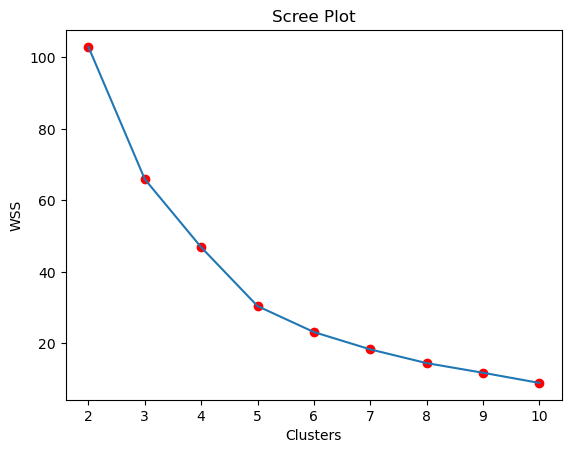

In [14]:
Ks = [2,3,4,5,6,7,8,9,10]
scores = []
for i in Ks:

    clust = KMeans(n_clusters=i,random_state=24)
    clust.fit(nutscaled)
    scores.append(clust.inertia_)
plt.scatter(Ks , scores, c= 'red')
plt.plot(Ks , scores)
plt.title("Scree Plot")
plt.xlabel("Clusters")
plt.ylabel('WSS')
plt.show()